In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Qn 1

## Task 1

In [69]:
# filter for rows on motocycles
vehicle_inspection = pd.read_csv("AnnualMotorVehicleInspectionPassingRateofMotorVehiclesonFirstInspection.csv")
motorcycles = vehicle_inspection.query("type == 'Motorcycles'")
print(motorcycles)

# average passing rate as the total of number_passed & total of number_reported
total_passed = motorcycles["number_passed"].sum()
total_reported = motorcycles["number_reported"].sum()
avg_pass_rate = total_passed / total_reported
print(avg_pass_rate*100)

     year         type  age  number_reported  number_passed  passing_rate
11   2006  Motorcycles    1              343            329     95.900000
12   2006  Motorcycles    2              577            541     93.800000
13   2006  Motorcycles    3            16235          15066     92.800000
14   2006  Motorcycles    4            15695          14686     93.600000
15   2006  Motorcycles    5            12434          11456     92.100000
..    ...          ...  ...              ...            ...           ...
743  2017  Motorcycles    7             7779           7517     96.631958
744  2017  Motorcycles    8             8268           7961     96.286889
745  2017  Motorcycles    9             7250           6934     95.641379
746  2017  Motorcycles   10             5343           5117     95.770167
747  2017  Motorcycles  >10            45218          43186     95.506214

[132 rows x 6 columns]
93.30908496284297


## Task 2

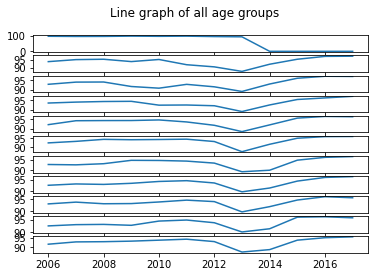

In [39]:
# look through motorcycles age 1 from 2006 to 2017
ages = motorcycles["age"].unique()
# print(len(ages))

fig, axs = plt.subplots(len(ages), sharex=True)
fig.suptitle('Line graph of all age groups')
i = 0
for age in ages:
    axs[i].plot(motorcycles.query(f"age == '{age}'")["year"], motorcycles.query(f"age == '{age}'")["passing_rate"])
    i += 1

In [59]:
# see latest passing rate for each age group
print("Age\t Estimated Passing rate")
for age in ages:
    print(age, '\t',motorcycles.query(f"age == '{age}' and year == 2017")["passing_rate"].values)

Age	 Estimated Passing rate
1 	 [0.]
2 	 [97.25766521]
3 	 [96.96001549]
4 	 [97.24315748]
5 	 [96.21023857]
6 	 [96.1467161]
7 	 [96.63195784]
8 	 [96.28688921]
9 	 [95.64137931]
10 	 [95.77016657]
>10 	 [95.50621434]


## Task 3

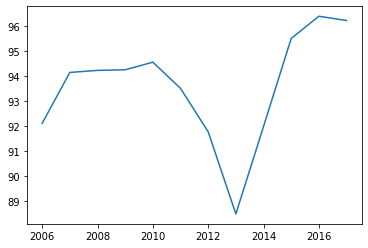

In [47]:
# visualise the data
motorcycles_age_5 = motorcycles.query(f"age == '5'")
plt.plot(motorcycles_age_5["year"], motorcycles_age_5["passing_rate"])

In [66]:
# discard years 2013 & 2014
motorcycles_age_5_clean = motorcycles_age_5.query("year < 2013 or year > 2014")
motorcycles_age_5_clean

,year,type,age,number_reported,number_passed,passing_rate
15,2006,Motorcycles,5,12434,11456,92.100000
81,2007,Motorcycles,5,15653,14735,94.135310
147,2008,Motorcycles,5,14386,13554,94.216599
214,2009,Motorcycles,5,11686,11013,94.240972
280,2010,Motorcycles,5,11495,10868,94.545455
345,2011,Motorcycles,5,11028,10311,93.498368
411,2012,Motorcycles,5,10004,9180,91.763295
609,2015,Motorcycles,5,8163,7795,95.491853
675,2016,Motorcycles,5,7598,7323,96.380626
741,2017,Motorcycles,5,8048,7743,96.210239


In [67]:
import numpy as np
import scipy.stats as st
  
# create 95% confidence interval
st.t.interval(alpha=0.95,
              df=len(motorcycles_age_5_clean)-1,
              loc=np.mean(motorcycles_age_5_clean["passing_rate"].values), 
              scale=st.sem(motorcycles_age_5_clean["passing_rate"].values)
)

(93.15528041663494, 95.36126291536509)

# Qn 2

## Task 1

In [2]:
hdb = pd.read_csv("CEASalespersonsPropertyTransactionRecordsresidential.csv")
hdb.head()

,salesperson_name,transaction_date,salesperson_reg_num,property_type,transaction_type,represented,town,district,general_location
0,SOH HUI HUA,OCT-2017,P000003I,HDB,RESALE,SELLER,YISHUN,-,-
1,SOH HUI HUA,MAR-2018,P000003I,HDB,RESALE,BUYER,KALLANG/WHAMPOA,-,-
2,SOH HUI HUA,JAN-2017,P000003I,HDB,RESALE,BUYER,YISHUN,-,-
3,SOH HUI HUA,MAY-2018,P000003I,HDB,RESALE,SELLER,CHOA CHU KANG,-,-
4,SOH HUI HUA,NOV-2017,P000003I,HDB,RESALE,SELLER,CHOA CHU KANG,-,-


In [3]:
# clean data of entries with no salesperson
print(len(hdb))
hdb = hdb[hdb["salesperson_name"]!="-"]
print(len(hdb))

760120
760034


In [5]:
# Engineer features for task 1
# getting "year" of sale
hdb["year"] = hdb["transaction_date"].apply(lambda x: x.split('-')[1])
hdb["year"].value_counts()

# getting "years_experience" which is number of years of experience of each salesperson
num_of_years_exp = hdb.groupby(by=["salesperson_name"])["year"].nunique()
print(num_of_years_exp[0])
hdb["num_of_years_exp"] = hdb["salesperson_name"].map(num_of_years_exp)
# hdb["num_of_years_exp"].describe()

num_of_sales = hdb.query("represented == 'SELLER'").groupby(by=["salesperson_name"]).count()["transaction_date"]
print(num_of_sales[0])
hdb["num_of_sales"] = hdb["salesperson_name"].map(num_of_sales).fillna(0)

4
31


In [8]:
hdb["mean_sales"] = hdb["num_of_sales"] / hdb["num_of_years_exp"]
mean_sales_series = hdb.query("represented == 'SELLER'").groupby(by=["salesperson_name"]).agg('mean')["mean_sales"]
mean_sales_series.describe()

<ipython-input-8-c647bd60ad84>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_sales_series = hdb.query("represented == 'SELLER'").groupby(by=["salesperson_name"]).agg('mean')["mean_sales"]


count    20632.000000
mean         2.085988
std          3.388030
min          0.142857
25%          0.666667
50%          1.166667
75%          2.333333
max        207.142857
Name: mean_sales, dtype: float64

## Task 2

<Axes: xlabel='mean_sales', ylabel='Density'>

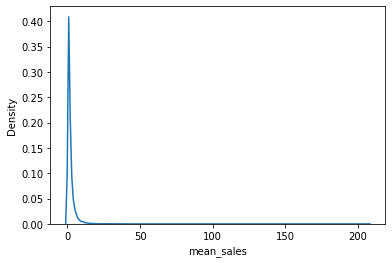

In [11]:
import seaborn as sns
import numpy as np
sns.kdeplot(mean_sales_series)

<Axes: xlabel='mean_sales', ylabel='Density'>

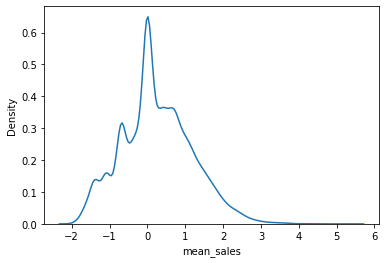

In [12]:
sns.kdeplot(np.log(mean_sales_series))

## Task 3

In [46]:
from mlxtend.frequent_patterns import apriori, association_rules

seller = hdb.query("represented == 'SELLER'")
seller["transaction_id"] = seller[["salesperson_name", "year"]].apply("_".join, axis=1)
seller["transaction_id"].value_counts() > 1


c:\Users\Daniel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-46-f67eef637607>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seller["transaction_id"] = seller[["salesperson_name", "year"]].apply("_".join, axis=1)


KUAH KAI PIN, KAVIN_2021       True
ADRIAN LIM LING CHONG_2022     True
KUAH KAI PIN, KAVIN_2022       True
KUAH KAI PIN, KAVIN_2020       True
CHEE KOK LEONG_2022            True
                              ...  
TAN KAR BOON_2022             False
TEO YEOW KIAT, MELVIN_2022    False
LIM MONG SIAH RENEE_2022      False
TAN AI KIM_2022               False
WONG ZHENHUA, MELVIN_2023     False
Name: transaction_id, Length: 65369, dtype: bool

In [31]:
data_one_hot = pd.get_dummies(seller[["town"]], columns=['town'])
data_one_hot

c:\Users\Daniel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,town_-,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,...,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760060,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
760065,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
760066,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
760067,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:

#set a threshold value for the support value and calculate the support value.
apriori_df = apriori(data_one_hot, min_support = 0.000001, use_colnames = True, verbose = 1)
apriori_df


c:\Users\Daniel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\Users\Daniel\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 702 combinations | Sampling itemset size 2


,support,itemsets
0,0.318968,(town_-)
1,0.027719,(town_ANG MO KIO)
2,0.036287,(town_BEDOK)
3,0.012543,(town_BISHAN)
4,0.023899,(town_BUKIT BATOK)
5,0.025781,(town_BUKIT MERAH)
6,0.026141,(town_BUKIT PANJANG)
7,0.001769,(town_BUKIT TIMAH)
8,0.005394,(town_CENTRAL AREA)
9,0.032089,(town_CHOA CHU KANG)


In [43]:

#Let's view our interpretation values using the Associan rule function.
df_ar = association_rules(apriori_df, min_threshold= 0.001)
df_ar

# seller_town = seller.groupby(by=["transaction_id", "town"]).agg("count")
# seller_town

# seller_town_list = []
# for s in seller["transaction_id"]:
#     seller_town_list.append(seller[seller["transaction_id"] == {s}]["town"].unique())

# seller_town_list[:10]
# # s = pycaret.setup(data = hdb, transaction_id = 'InvoiceNo', item_id = 'Description')

c:\Users\Daniel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


# Qn 3

## Task 1

In [94]:
from pykml import parser
import pandas as pd

filename = 'WirelessHotSpotsKML.kml'
with open(filename) as fobj:
    folder = parser.parse(fobj).getroot().Document.Folder

places = []
for pm in folder.Placemark:
    plnm1 = pm.name
    data = {item.get("name"): item.text for item in
            pm.ExtendedData.SchemaData.SimpleData}
    places.append({"Y": data.get('Y'),
                "X": data.get('X'),
                "LOCATION_NAME": data.get('LOCATION_NAME'),
                "LOCATION_TYPE": data.get('LOCATION_TYPE'),
                "LOCATION_TYPE": data.get('LOCATION_TYPE'),
                "POSTAL_CODE": data.get('POSTAL_CODE'),
                "STREET_ADDRESS": data.get('STREET_ADDRESS'),
                "OPERATOR_NAME": data.get('OPERATOR_NAME'),
                "INC_CRC": data.get('INC_CRC'),
                "FMEL_UPD_D": data.get('FMEL_UPD_D'),
                })
    # plnm.append(plnm1.text)
    # holeNumber.append(val1.text)

df = pd.DataFrame(places)
print(df)


                Y            X          LOCATION_NAME     LOCATION_TYPE  \
0     36922.92412  18450.95232         Bukit Batok CC         Community   
1     45530.46595  28308.65184     1 Northpoint Drive         Community   
2     31394.65632  30187.62071        155 Waterloo St        Government   
3     29861.29437  29464.67939  20 Upper Pickering St         Community   
4     42345.17715  34269.36498         7 Star Canteen               F&B   
...           ...          ...                    ...               ...   
1795  33949.27857  30324.03757         Whampoa Market               F&B   
1796  35706.37936  32173.31857        Woodleigh - NEL  Public Transport   
1797  45686.07005  28187.67873       Yishun MRT - NSL  Public Transport   
1798  36394.85093  16691.34633            Yuhua Place               F&B   
1799  36184.92545  17375.49992          Yuhua Village               F&B   

     POSTAL_CODE             STREET_ADDRESS OPERATOR_NAME           INC_CRC  \
0         659959    

c:\Users\Daniel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [134]:
df.Y = pd.to_numeric(df.Y, errors='coerce')
df.X = pd.to_numeric(df.X, errors='coerce')
df.Y.describe()

c:\Users\Daniel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count     1782.000000
mean     35447.183197
std       5030.965467
min      25123.177400
25%      31348.456383
50%      35073.266880
75%      38881.653157
max      48958.524020
Name: Y, dtype: float64

## Task 2

In [136]:
df.describe()

c:\Users\Daniel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Y,X
count,1782.000000,1782.000000
mean,35447.183197,28812.265291
std,5030.965467,7265.850311
min,25123.177400,3292.843990
25%,31348.456383,24429.369530
50%,35073.266880,28734.222910
75%,38881.653157,33992.694140
max,48958.524020,45547.959790


In [125]:
df.isnull().sum().sort_values(ascending=False)

c:\Users\Daniel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STREET_ADDRESS    2
Y                 0
X                 0
LOCATION_NAME     0
LOCATION_TYPE     0
POSTAL_CODE       0
OPERATOR_NAME     0
INC_CRC           0
FMEL_UPD_D        0
is_HDB            0
is_MRT            0
dtype: int64

In [121]:
# Setting rarest location to "others"
df[df["LOCATION_TYPE"] == "Tourist Attraction"] = "Others"
df[df["LOCATION_TYPE"] == "Dormitory / Care Centre"] = "Others"
df[df["LOCATION_TYPE"] == "Public Worship"] = "Others"

df.LOCATION_TYPE.value_counts()

# Feature engineering
# 1. is_HDB: indicates if a hotspot is located in a HDB building

postal_code_endings = df["POSTAL_CODE"].apply(lambda x: x[-3:])
bldg_num = df["STREET_ADDRESS"].apply(lambda x: x.split ()[0] if x else "-")

df["is_HDB"] = [x[0] in x[1] for x in zip(postal_code_endings, bldg_num)]
print(df["is_HDB"].value_counts())

# 2. is_MRT: indicates if a hotspot is located in MRT station
mrt_list = ["EWL","NSL","CCL","DTL","TEL","JRL","CRL","LRT"]
df["is_MRT"] = df["LOCATION_NAME"].apply(lambda x: any(substring in x for substring in mrt_list))
print(df["is_MRT"].value_counts())

False    1124
True      676
Name: is_HDB, dtype: int64
False    1772
True       28
Name: is_MRT, dtype: int64


c:\Users\Daniel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [159]:
# Train test split
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])


num_attribs = ["Y", "X"]
cat_attribs = ["OPERATOR_NAME", "is_HDB", "is_MRT"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

le = LabelEncoder()
le.fit(df["LOCATION_TYPE"])
df["target"] = le.transform(df["LOCATION_TYPE"])
print(df["target"].value_counts())

df_processed = preprocess_pipeline.fit_transform(df[num_attribs + cat_attribs])

X_train = df_processed[:1600,:]
y_train = df["target"][:1600]
print(y_train.value_counts())

X_test = df_processed[1600:,:]
y_test = df["target"][1600:]
print(y_test.value_counts())

1     557
2     428
4     415
0     125
10    123
6      46
3      25
8      24
7      23
5      18
9      16
Name: target, dtype: int64
1     555
4     363
2     323
10    122
0     117
6      30
3      24
7      20
5      18
8      16
9      12
Name: target, dtype: int64
2     105
4      52
6      16
0       8
8       8
9       4
7       3
1       2
10      1
3       1
Name: target, dtype: int64


c:\Users\Daniel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\Users\Daniel\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [164]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

## ---------- Model Classification Report ----------
## get predictions and create model quality report

y_pred = classifier.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
conf = confusion_matrix(y_test, y_pred)
print(conf)

print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling


------------------ Confusion Matrix -----------------

[[ 0  0  6  0  0  0  0  1  1  0]
 [ 0  0  2  0  0  0  0  0  0  0]
 [ 0  0 92  1  2  8  2  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 1  0  5  0  0 10  0  0  0  0]
 [ 0  0  2  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  1  0]]

-------------------- Key Metrics --------------------

Accuracy: 0.57
Balanced Accuracy: 0.38

Micro Precision: 0.57
Micro Recall: 0.57
Micro F1-score: 0.57

Macro Precision: 0.30
Macro Recall: 0.38
Macro F1-score: 0.33

Weighted Precision: 0.40
Weighted Recall: 0.57
Weighted F1-score: 0.47

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.58      0.88      0.70       105
           3       0.00      0.00      0.00    

c:\Users\Daniel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\Users\Daniel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Daniel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Daniel\anaconda3\lib\site-